## Data Exploratory Analysis 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_excel('Operations-Dem-Planning_-BikeShare.xlsx')

In [3]:
df.shape

(17379, 12)

In [4]:
df.head()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,1,16,1,1,0,0,6,0,1,37,0.81,0.0
1,2,40,1,1,1,0,6,0,1,36,0.80,0.0
2,3,32,1,1,2,0,6,0,1,36,0.80,0.0
3,4,13,1,1,3,0,6,0,1,37,0.75,0.0
4,5,1,1,1,4,0,6,0,1,37,0.75,0.0


In [5]:
df.tail()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
17374,17375,119,1,12,19,0,1,1,2,34,0.60,0.1642
17375,17376,89,1,12,20,0,1,1,2,34,0.60,0.1642
17376,17377,90,1,12,21,0,1,1,1,34,0.60,0.1642
17377,17378,61,1,12,22,0,1,1,1,36,0.56,0.1343
17378,17379,49,1,12,23,0,1,1,1,36,0.65,0.1343


In [6]:
df.describe()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,189.463088,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,59.719719,0.627229,0.190098
std,5017.0295,181.387599,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,20.406317,0.192930,0.122340
min,1.0000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,4345.5000,40.000000,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,43.000000,0.480000,0.104500
50%,8690.0000,142.000000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,61.000000,0.630000,0.194000
75%,13034.5000,281.000000,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,77.000000,0.780000,0.253700
max,17379.0000,977.000000,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,122.000000,1.000000,0.850700


## Business Problem: How to plan the demand for sharing bikes based on season, day, hour, and whether in the particular area this dataset represents 

#### Referencing data source: https://www.kaggle.com/c/bike-sharing-demand/data

### Target variable: Riders - numerical 

### Predictors: Categorical & Numerical 
Categorical features: Season, Month, Hour, Holiday, Weekday, Workday, Weather 

Numerical features: Temperature, Humidity, Wind 

### Check missing values 

In [7]:
df.isnull().sum()

Instant        0
Riders         0
Season         0
Month          0
Hour           0
Holiday        0
Weekday        0
Workday        0
Weather        0
Temperature    0
Humidity       0
Wind           0
dtype: int64

### - No missing values, Yay! 

In [8]:
categorical_cols=['Season','Month','Hour','Holiday','Weekday','Workday','Weather']
numerical_cols=['Temperature', 'Humidity','Wind']

## Visualizations 
### Single variable plot - Histogram 

<AxesSubplot:>

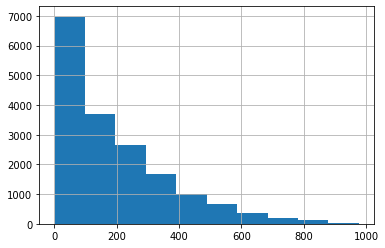

In [9]:
df['Riders'].hist()

## Pairwise Plots

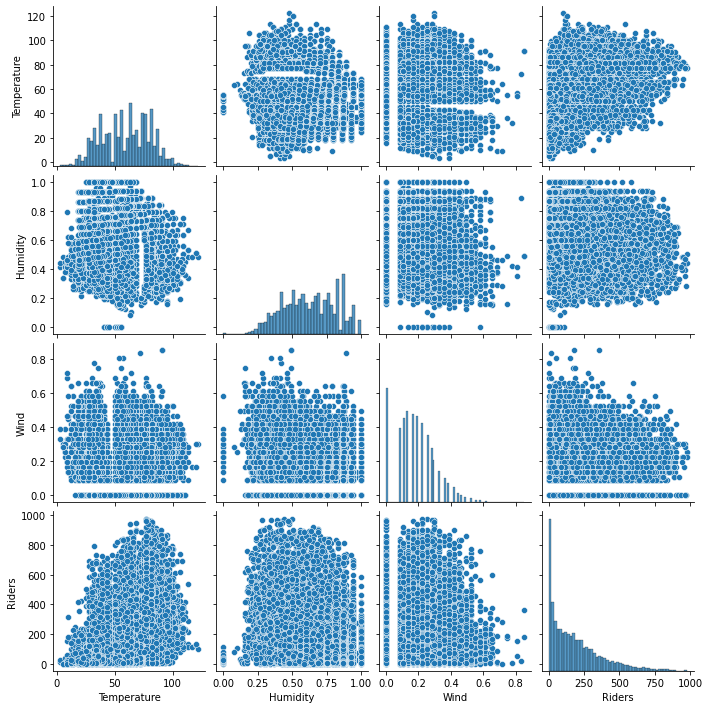

In [10]:
sns.pairplot(df[[*numerical_cols,'Riders']])

### - The pairwise plot indicates that there are more riders when temperature is mild (neither too hot nor too cold) 

## Correlations between numeric variables 

<AxesSubplot:>

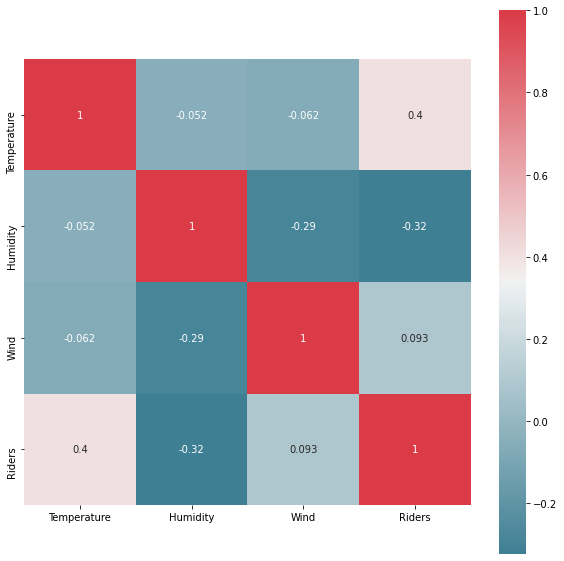

In [11]:
f, ax = plt.pyplot.subplots(figsize=(10, 10))
corr = df[[*numerical_cols,'Riders']].corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, annot = True)

## Correlations between all variables 

<AxesSubplot:>

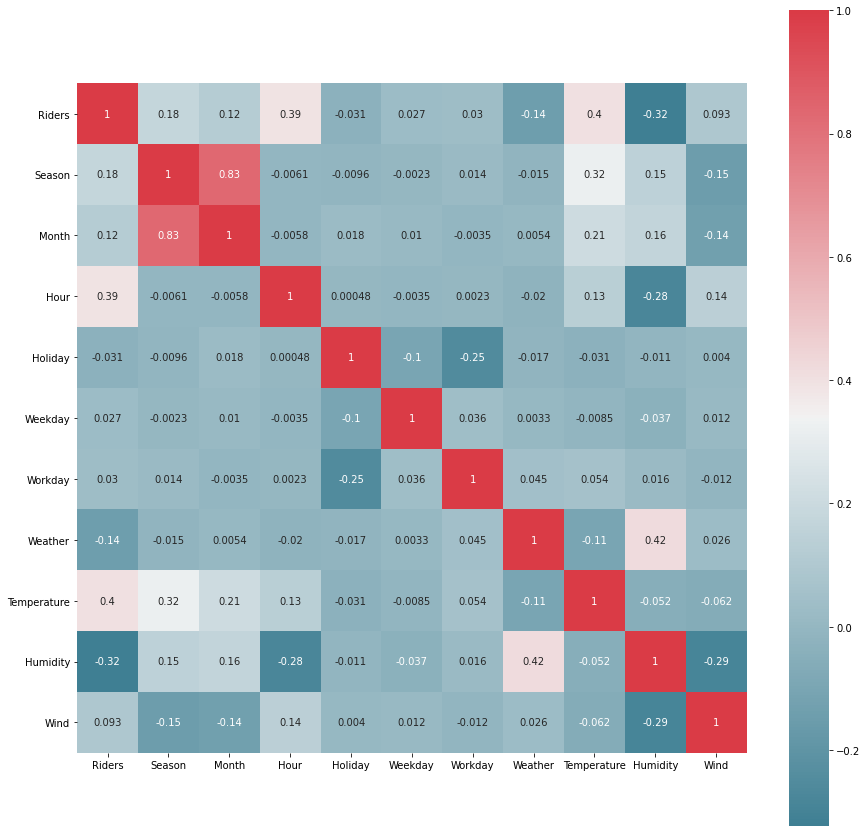

In [12]:
variables = df.loc[:, df.columns != 'Instant']
f, ax = plt.pyplot.subplots(figsize=(15, 15))
corr = variables.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, annot = True)

### Features that have relatively higher Correlation with Riders (>0.1)
### Positive: Temperature, hour, month, season 
     - hour: daytime leads to more riders 

### Negative: Humidity, weather
    - mild weather leads to more riders

# 2. Preprocessing

In [13]:
df.head(5)

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,1,16,1,1,0,0,6,0,1,37,0.81,0.0
1,2,40,1,1,1,0,6,0,1,36,0.80,0.0
2,3,32,1,1,2,0,6,0,1,36,0.80,0.0
3,4,13,1,1,3,0,6,0,1,37,0.75,0.0
4,5,1,1,1,4,0,6,0,1,37,0.75,0.0


In [14]:
df.groupby('Season')['Temperature'].mean()

Season
1    38.622112
2    65.043774
3    81.100756
4    52.605624
Name: Temperature, dtype: float64

In [15]:
df['Season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'}, inplace=True)

In [16]:
df.head(5)

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,1,16,winter,1,0,0,6,0,1,37,0.81,0.0
1,2,40,winter,1,1,0,6,0,1,36,0.80,0.0
2,3,32,winter,1,2,0,6,0,1,36,0.80,0.0
3,4,13,winter,1,3,0,6,0,1,37,0.75,0.0
4,5,1,winter,1,4,0,6,0,1,37,0.75,0.0


In [17]:
df[df['Season']=='winter']['Month'].unique()

array([ 1,  2,  3, 12])

In [18]:
df[df['Season']=='spring']['Month'].unique()

array([3, 4, 5, 6])

In [19]:
df[df['Season']=='summer']['Month'].unique()

array([6, 7, 8, 9])

In [20]:
df[df['Season']=='fall']['Month'].unique()

array([ 9, 10, 11, 12])

In [21]:
df['Month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
                     7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}, inplace=True) 

In [22]:
df['Weekday'].replace({0:'Sunday', 1:'Monday', 2:'Tuesday', 3: 'Wednesday',4:'Thursday', 5:'Friday', 6:'Saturday'}, inplace=True) 

In [23]:
df.groupby('Season')['Weather'].mean()

Season
fall      1.472117
spring    1.443638
summer    1.330294
winter    1.460160
Name: Weather, dtype: float64

### weather 
1: Clear, Few clouds, Partly cloudy, Partly cloudy: Favorable (for bikeriding) 

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist: Relatively Favorable

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds: Relatively Unfavorable

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog : Unfavorable

In [24]:
df['Weather'].replace({1:'Favorable', 2:'Relatively Favorable', 3:'Relatively Unfavorable', 4:'Unfavorable'},inplace=True)

In [25]:
df.head(5)

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,1,16,winter,January,0,0,Saturday,0,Favorable,37,0.81,0.0
1,2,40,winter,January,1,0,Saturday,0,Favorable,36,0.80,0.0
2,3,32,winter,January,2,0,Saturday,0,Favorable,36,0.80,0.0
3,4,13,winter,January,3,0,Saturday,0,Favorable,37,0.75,0.0
4,5,1,winter,January,4,0,Saturday,0,Favorable,37,0.75,0.0


In [26]:
df.tail(5)

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
17374,17375,119,winter,December,19,0,Monday,1,Relatively Favorable,34,0.60,0.1642
17375,17376,89,winter,December,20,0,Monday,1,Relatively Favorable,34,0.60,0.1642
17376,17377,90,winter,December,21,0,Monday,1,Favorable,34,0.60,0.1642
17377,17378,61,winter,December,22,0,Monday,1,Favorable,36,0.56,0.1343
17378,17379,49,winter,December,23,0,Monday,1,Favorable,36,0.65,0.1343


## Determine the Timeframe of the dataset

In [27]:
year_count = 0
first_mon = df['Month'][0]
for i in range(len(df['Month'])):
    Month = df['Month']
    if Month[i] == first_mon and Month[i+1] != first_mon:
        year_count +=1
print("The year count is: %d" % year_count)
print('First Month is: %s' % first_mon)
print('Last Month is: %s' % df['Month'].iloc[-1])

The year count is: 2
First Month is: January
Last Month is: December


### Check missing rows%

In [28]:
#df['Month Weekday'] = df['Month']+df['Weekday']
#df['Month Weekday']
df['Weekday'];
(df.shape[0] -365*2*24)/df.shape[0]

-0.008113240117383048

In [29]:
df.to_excel('bikeshare_data_clean_no_bin.xlsx')

## Bin Hour into categories 

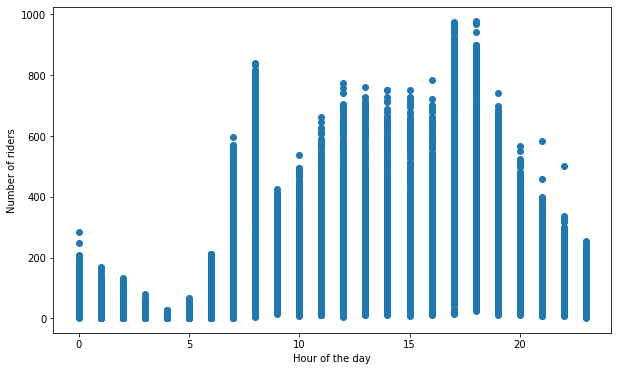

In [30]:
fig, ax = plt.pyplot.subplots(figsize=(10, 6))
ax.scatter(x = df['Hour'], y = df['Riders'])
plt.pyplot.xlabel("Hour of the day")
plt.pyplot.ylabel("Number of riders")

plt.pyplot.show()

### Feature engineering 

Hour 6,7,8,9,10,11 Morning (6)

Hour 12,13,14,15,16,17 Afternoon (6)

Hour 18,19,20,21,22,23 Evening (6) 

Hour 0,1,2,3,4,5 Midnight (6)

In [31]:
df['Hour'].replace({0:'Midnight', 1:'Midnight', 2:'Midnight',3:"Midnight", 4:"Midnight", 5:'Midnight',
                            6:'Morning', 7:'Morning', 8:'Morning', 9:'Morning', 10:'Morning', 11:'Morning',
                           12:'Afternoon', 13:'Afternoon', 14:'Afternoon', 15:'Afternoon', 16:'Afternoon', 17:'Afternoon',
                           18:'Evening', 19:'Evening', 20:'Evening', 21:'Evening', 22:'Evening',23:'Evening'},inplace=True)

In [32]:
df['Hour'].value_counts()

Afternoon    4375
Evening      4368
Morning      4360
Midnight     4276
Name: Hour, dtype: int64

## Outlier Detection 

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Riders'>

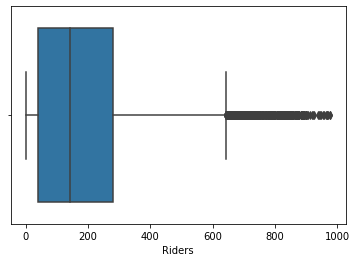

In [33]:
sns.boxplot(df['Riders'])

In [34]:
Q1 = df['Riders'].quantile(0.25)
Q3 = df['Riders'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

241.0


In [35]:
print(Q1 - 1.5 * IQR)
print(Q3 + 1.5 * IQR)

-321.5
642.5


In [36]:
df['Riders'][df['Riders']>642.5].count()

505

In [37]:
df['Riders'].count()

17379

In [38]:
505/17379

0.029058058576442832

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

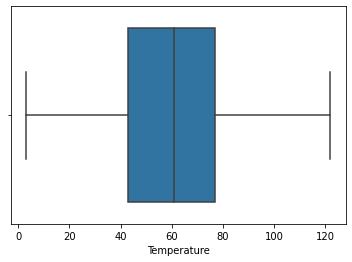

In [39]:
sns.boxplot(df['Temperature'])

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind'>

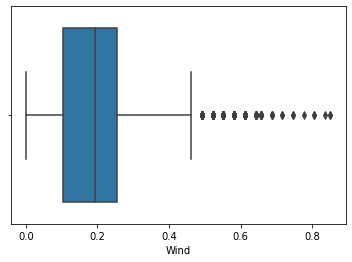

In [40]:
sns.boxplot(df['Wind'])

In [41]:
Q1_wd = df['Wind'].quantile(0.25)
Q3_wd = df['Wind'].quantile(0.75)
IQR_wd = Q3_wd - Q1_wd
print(IQR_wd)

0.1492


In [42]:
print(Q1_wd - 1.5 * IQR_wd)
print(Q3_wd + 1.5 * IQR_wd)

-0.1193
0.4775


In [43]:
df['Wind'][df['Wind']>0.4775].count()

342

In [44]:
342/17379

0.01967892283790782

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity'>

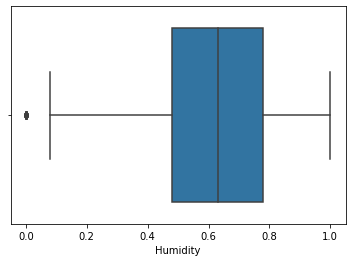

In [45]:
sns.boxplot(df['Humidity'])

In [46]:
Q1_hm = df['Humidity'].quantile(0.25)
Q3_hm = df['Humidity'].quantile(0.75)
IQR_hm = Q3_hm - Q1_hm
print(IQR_hm)

0.30000000000000004


In [47]:
print(Q1_hm - 1.5 * IQR_hm)
print(Q3_hm + 1.5 * IQR_hm)

0.029999999999999916
1.23


In [48]:
df['Humidity'][df['Humidity']<0.02999].count()

22

In [49]:
22/17379

0.001265895621151965

In [50]:
df_no_outlier = df[~(df['Humidity']<0.02999)]

In [51]:
df_no_outlier.shape

(17357, 12)

In [52]:
df_no_outlier.reset_index(drop=True, inplace =True)

In [53]:
df_no_outlier.tail()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
17352,17375,119,winter,December,Evening,0,Monday,1,Relatively Favorable,34,0.60,0.1642
17353,17376,89,winter,December,Evening,0,Monday,1,Relatively Favorable,34,0.60,0.1642
17354,17377,90,winter,December,Evening,0,Monday,1,Favorable,34,0.60,0.1642
17355,17378,61,winter,December,Evening,0,Monday,1,Favorable,36,0.56,0.1343
17356,17379,49,winter,December,Evening,0,Monday,1,Favorable,36,0.65,0.1343


In [ ]:
df_no_outlier.to_excel('bikeshare_data_clean_no_outlier.xlsx')

### There is no record for 0 riders. This might be the reason for missing rows.

In [ ]:
df.to_excel('bikeshare_data_clean.xlsx')

In [ ]:
df.describe()